<a href="https://colab.research.google.com/github/kodandachalla/Stewart_Platform-Inverse_Kinematics/blob/main/Hexapod_Inverse_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Based Design (MBD)

Inverse Kinematics of the Stewart Platform (HEXAPOD)


 ## Libraries & Mount google drive

- NumPy
- SciPy
- Pandas
- Plotly

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import pandas as pd
import plotly.graph_objects as go


from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image, display

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Functions

> Rotate points in clockwise direction

> Euler angles to a Rotation matrix

> Print array with shape

> Plot line marker

> center and angles from rectangle vertex

> Calculate_leg_lens

In [2]:
def rotate_points_scipy(x, y, z, axis, angle_deg):
    """
    Rotates 3D points clockwise around a given axis (X, Y, or Z) using scipy.

    :param x: List or NumPy array of X-coordinates
    :param y: List or NumPy array of Y-coordinates
    :param z: List or NumPy array of Z-coordinates
    :param axis: Rotation axis ('x', 'y', or 'z')
    :param angle_deg: Rotation angle in degrees (clockwise)
    :return: Rotated X, Y, Z as separate NumPy arrays

    """
    #angle_rad = np.radians(-angle_deg)  # Negative for clockwise rotation
    rotation = R.from_euler(axis, angle_deg, degrees=True)  # Rotation object

    # Stack X, Y, Z into a (N, 3) array
    points = np.column_stack((x, y, z))

    # Apply rotation to all points
    rotated_points = rotation.apply(points)

    return rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2]  # Return X, Y, Z separately

In [3]:
# Convert orientation to the rotation matrix
# Create a rotation object from Euler angles

def euler_to_rotation_matrix(desired_orientation):

  rotation = R.from_euler('XYZ', desired_orientation, degrees= True)

  # Convert to the rotation matrix
  rotation_matrix = rotation.as_matrix()

  return rotation_matrix

In [4]:
def print_with_shape(array,*name):
    print(*name,":\n")
    print(array,"\n")
    print(*name,"Shape:")
    print(array.shape,"\n \n")
    return

In [5]:
def plot_line_marker(X, Y, Z,  Name, modes= 'lines', line_Color = "yellow", markers_Color = "yellow"):

    fig.add_trace(go.Scatter3d(
      x=X,
      y=Y,
      z=Z,
      mode=modes,
      name=Name,          # Name of the line
      line=dict(color=line_Color, width=4),  # Line color and width
      marker=dict(size=5, color = markers_Color)   # Marker size and color

      ))
    return

In [6]:
def centre_angles(matrix):
    # matrix: 3x4 numpy array representing 3D coordinates of rectangle corners

    centroid = np.mean(matrix, axis=1)
    A = matrix[:, 0]
    B = matrix[:, 1]
    C = matrix[:, 2]
    D = matrix[:, 3]


    ## VVIP: A needed to be corner point for B & D
    AB = A - B
    AD = D - A
    normal = np.cross(AD, AB)
    normal = normal / np.linalg.norm(normal)  # normalize

    e1 = AB / np.linalg.norm(AB)
    e2 = np.cross(normal, e1)

    rotation_matrix = np.column_stack((e1, e2, normal))

    xyz_rot = R.from_matrix(rotation_matrix).as_euler('XYZ', degrees=True)

    return rotation_matrix, centroid, xyz_rot


matrix = np.array([
    [  61.45026481, -100.34757389,  -61.45635055,  100.32112772],
     [ 124.77347264,   94.65715532, -124.81485805,  -94.62372186],
      [ 192.85108954,  203.79734603,  173.06244538,  162.12717018]])


rotation_matrix, centroid, xyz_rot = centre_angles(matrix)
print(centroid)
print(xyz_rot)

[-8.13297750e-03 -1.98798750e-03  1.82959513e+02]
[7.0665362  5.14496661 9.96448684]


In [7]:
def Calculate_leg_lens(desired_position, desired_orientation, Platform):

  # Calculate leg lengths
  leg_lengths = np.zeros(6)


  print("Leg Lengths are:")
  rotation_matrix = euler_to_rotation_matrix(desired_orientation)
  for i in np.arange(6):
      # Position of the attachment point on the moving platform in the world frame
      Pi = desired_position + np.dot(rotation_matrix , Platform[:,i])

      # Vector from base attachment point to moving platform attachment point
      L = Pi - B[:, i]

      # Leg length
      leg_lengths[i] = np.linalg.norm(L)

      print( i+1,":", leg_lengths[i])

  return leg_lengths

## Real data from calibration

- **Fixed Platform Leg Points (B)**

- **Moving Platform Leg Points (P)**

>  **Fixed & Fixed Platform:** Universal joints located at 11 mm from the Z-plane (CYL Plane)

- **Fixed and Moving platform Cornor points**

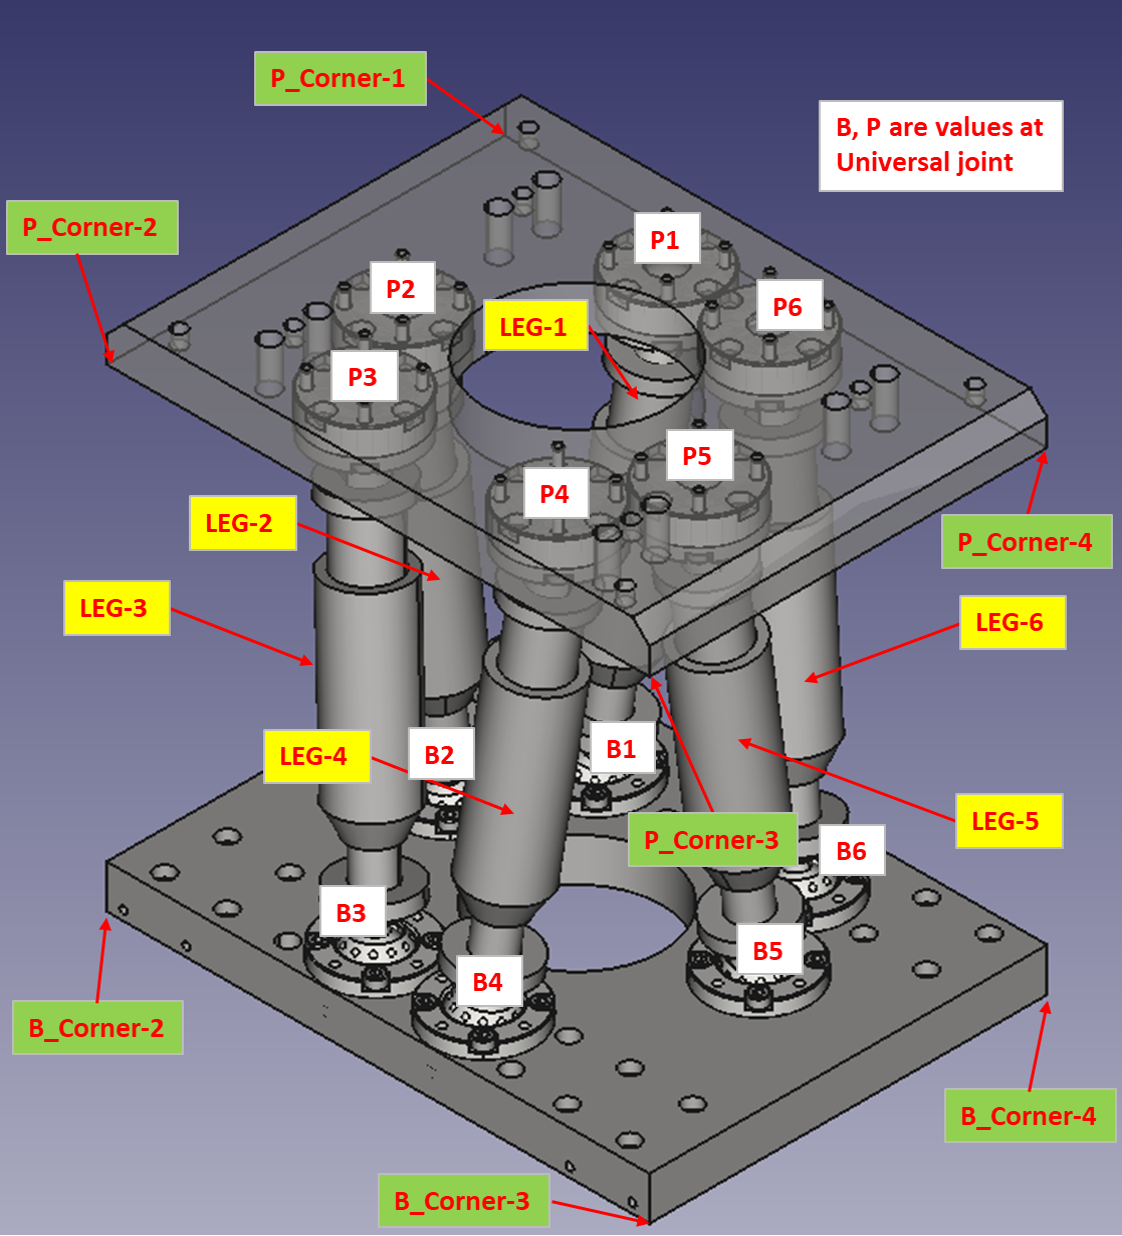

In [8]:
display(Image('/content/drive/My Drive/Colab Notebooks/Hexapod/Images/Stewart.png', width=320, height=350))

In [9]:
# Fixed platform Adjusted leg points
B1=[49.834,41.765,-10.52+11]
B2=[11.327,63.988,-10.504+11]
B3=[-61.058, 22.228,-10.654+11]
B4=[-61.06,-22.233,-10.803+11]
B5=[11.3,-64.009,-10.898+11]
B6=[49.825,-41.784,-10.779+11]
B = np.array([B1, B2, B3, B4, B5, B6])
B = B.T

print_with_shape(B,"Fixed platform leg points")

# Moving platform Adjusted leg points
P1=[58.708,21.383,-11.171+11]
P2=[-10.875,61.556,-10.94+11]
P3=[-47.912,40.187,-10.888+11]
P4=[-47.907,-40.162,-11.017+11]
P5=[-10.873,-61.536,-11.135+11]
P6=[58.704,-21.364,-11.243+11]
P = np.array([P1, P2, P3, P4, P5, P6])
P = P.T

print_with_shape(P,"Moving platform leg points")

Fixed platform leg points :

[[ 49.834  11.327 -61.058 -61.06   11.3    49.825]
 [ 41.765  63.988  22.228 -22.233 -64.009 -41.784]
 [  0.48    0.496   0.346   0.197   0.102   0.221]] 

Fixed platform leg points Shape:
(3, 6) 
 

Moving platform leg points :

[[ 5.8708e+01 -1.0875e+01 -4.7912e+01 -4.7907e+01 -1.0873e+01  5.8704e+01]
 [ 2.1383e+01  6.1556e+01  4.0187e+01 -4.0162e+01 -6.1536e+01 -2.1364e+01]
 [-1.7100e-01  6.0000e-02  1.1200e-01 -1.7000e-02 -1.3500e-01 -2.4300e-01]] 

Moving platform leg points Shape:
(3, 6) 
 



In [10]:
# Cornor Points fixed platform

B_CORNER1 = [82.468,112.465,0.702]
B_CORNER2 = [-82.447,112.499,0.568]
B_CORNER3 = [-82.493,-112.516,-0.132]
B_CORNER4 = [82.468,-112.527,0.002]
B_CORNER = np.array([B_CORNER1, B_CORNER2, B_CORNER3, B_CORNER4])
B_CORNER = B_CORNER.T
print_with_shape(B_CORNER,"B_CORNER")

# Cornor points Moving Platform
P_CORNER1=[82.466,112.432,-0.052]
P_CORNER2=[-82.474,112.517,0.326]
P_CORNER3=[-82.474,-112.483,-0.029]
P_CORNER4=[82.459,-112.49,-0.407]
P_CORNOR = np.array([P_CORNER1, P_CORNER2, P_CORNER3, P_CORNER4])
P_CORNER = P_CORNOR.T
print_with_shape(P_CORNER,"P_CORNER")

B_CORNER :

[[ 8.24680e+01 -8.24470e+01 -8.24930e+01  8.24680e+01]
 [ 1.12465e+02  1.12499e+02 -1.12516e+02 -1.12527e+02]
 [ 7.02000e-01  5.68000e-01 -1.32000e-01  2.00000e-03]] 

B_CORNER Shape:
(3, 4) 
 

P_CORNER :

[[ 8.24660e+01 -8.24740e+01 -8.24740e+01  8.24590e+01]
 [ 1.12432e+02  1.12517e+02 -1.12483e+02 -1.12490e+02]
 [-5.20000e-02  3.26000e-01 -2.90000e-02 -4.07000e-01]] 

P_CORNER Shape:
(3, 4) 
 



# Initial Calculation for all legs at Zero positions:

> Moving platform centre

> Pitch Roll Yaw

> legs length

In [11]:
# Platform 4 cornor points (3x4 matrix)
matrix = np.array([
    [  61.45026481, -100.34757389,  -61.45635055,  100.32112772],
    [ 124.77347264,   94.65715532, -124.81485805,  -94.62372186],
    [ 192.85108954,  203.79734603,  173.06244538,  162.12717018]])

rot_mat, centroid, xyz_rot = centre_angles(matrix)

leg_lengths_zero= Calculate_leg_lens(centroid, xyz_rot, P)




Leg Lengths are:
1 : 181.66439989014364
2 : 194.49540130897455
3 : 191.70094610894387
4 : 183.46364221389229
5 : 175.42305509004711
6 : 178.88440616030866


# Inverse Kinematic calculation

## Input

| Position (mm) /Orientation (deg)    | [ column Matrix] |Size|
|----------|----------|----------------|
| desired_position (mm)    | [ X; Y; Z] |3x1  |
| desired_orientation (deg)    | [rotX; rotY; totZ] |3x1    |




In [12]:
# Define the desired position and orientation of the moving platform

# Desired position [x, y, z] IN Millimeter

#desired_position = np.array([-2.912999998429377,   10.847999998730808,  182.8397499928279])
desired_position = np.array([0,0,183])

# Desired orientation [roll, pitch, yaw] In DEGREE

# desired_orientation = np.array([-0.5033999970290962, 1.3710000064312333, 3.1790000007285815])
desired_orientation = np.array([7,5,10])


print_with_shape(desired_position,"desired_position")
print_with_shape(desired_orientation,"desired_orientation")


desired_position :

[  0   0 183] 

desired_position Shape:
(3,) 
 

desired_orientation :

[ 7  5 10] 

desired_orientation Shape:
(3,) 
 



## Calculations

- **6 Leg lengths  in mm (leg_lengths) 1x6 Matrix**

In [13]:
leg_lengths = Calculate_leg_lens(desired_position, desired_orientation, P)

Leg Lengths are:
1 : 181.80811248959787
2 : 194.42310317915403
3 : 191.56738599273376
4 : 183.45877017854855
5 : 175.52865267850598
6 : 179.09488816858237


In [14]:
rotation_matrix = euler_to_rotation_matrix(desired_orientation)
P_leg_global = desired_position[:, np.newaxis] + np.dot(rotation_matrix , P)
print_with_shape(P_leg_global,"P_leg_global")

P_leg_global :

[[ 5.38821928e+01 -2.13122130e+01 -5.39466422e+01 -4.00536159e+01
  -3.38819835e-02  6.12666855e+01]
 [ 3.16151499e+01  5.80600448e+01  3.04347648e+01 -4.79389699e+01
  -6.20072675e+01 -1.00817847e+01]
 [ 1.81959427e+02  1.92068138e+02  1.91605355e+02  1.80627195e+02
   1.75252918e+02  1.76115958e+02]] 

P_leg_global Shape:
(3, 6) 
 



In [15]:
P_Cornor_global = desired_position[:, np.newaxis] + np.dot(rotation_matrix , P_CORNER)
print_with_shape(P_Cornor_global,"P_Cornor_global")

P_Cornor_global :

[[  61.45026481 -100.34757389  -61.45635055  100.32112772]
 [ 124.77347264   94.65715532 -124.81485805  -94.62372186]
 [ 192.85108954  203.79734603  173.06244538  162.12717018]] 

P_Cornor_global Shape:
(3, 4) 
 



## Plot


In [16]:
fig = go.Figure()

# Fixed platform Cornor points
x0 = np.append(B_CORNER[0], B_CORNER[0,0])
y0 = np.append(B_CORNER[1], B_CORNER[1,0])
z0 = np.append(B_CORNER[2], B_CORNER[2,0])
plot_line_marker(x0, y0, z0,  "Fixed platform upper plane", line_Color="red" ,markers_Color = "red",modes= "lines+markers")



# Plot Base platform leg points
x1 = np.append(B[0], B[0,0])
y1 = np.append(B[1], B[1,0])
z1 = np.append(B[2], B[2,0])

#plot_line_marker(X, Y, Z,  Name, modes= 'lines', line_Color = "yellow", markers_Color = "yellow"):
plot_line_marker(x1, y1, z1,  "lower_Leg universal joint", line_Color = "red")


# Plot TOP platform leg points
x2 = np.append(P_leg_global[0], P_leg_global[0,0])
y2 = np.append(P_leg_global[1], P_leg_global[1,0])
z2 = np.append(P_leg_global[2], P_leg_global[2,0])
plot_line_marker(x2, y2, z2, "upper_Leg universal joint",line_Color = "green")


# Plot TOP platform cornor points
x3 = np.append(P_Cornor_global[0], P_Cornor_global[0,0])
y3 = np.append(P_Cornor_global[1], P_Cornor_global[1,0])
z3 = np.append(P_Cornor_global[2], P_Cornor_global[2,0])
plot_line_marker(x3, y3, z3, "Moving platform lower plane",line_Color = "green", markers_Color="green",modes= "lines+markers")

#Plot Legs
colors = ['cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown']
for i in range(P_leg_global.shape[1]):
        x = [B[0, i], P_leg_global[0, i]]
        y = [B[1, i], P_leg_global[1, i]]
        z = [B[2, i], P_leg_global[2, i]]
        plot_line_marker(x, y, z, Name=f'leg {i + 1}', line_Color=colors[i], markers_Color=colors[i], modes= "lines+markers")

# Update layout with titles and labels
fig.update_layout(
    title='Hexapod Inverse', width=1200, height=800,
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
        aspectmode='data',))



fig.update_layout(
    scene_camera=dict(
        projection=dict(type='orthographic'),
        eye=dict(x=0, y=2, z=0) ))  # Look down along Z axis for XY plane view



## Outcomes

In [17]:
x, y, z = desired_position
roll, pitch, yaw = desired_orientation

print("INPUT")
print(f"\tPosition (mm):\n\t x = {x}\n\t y = {y}\n\t z = {z}\n")
print(f"\tOrientation (deg):\n\t roll = {roll}\n\t pitch = {pitch}\n\t yaw = {yaw}\n")
print("OUTPUT")
print("\tLeg Lengths (mm):")
for i, leg in enumerate (leg_lengths):
    print("\t",i+1,":", leg)

fig.show()

INPUT
	Position (mm):
	 x = 0
	 y = 0
	 z = 183

	Orientation (deg):
	 roll = 7
	 pitch = 5
	 yaw = 10

OUTPUT
	Leg Lengths (mm):
	 1 : 181.80811248959787
	 2 : 194.42310317915403
	 3 : 191.56738599273376
	 4 : 183.45877017854855
	 5 : 175.52865267850598
	 6 : 179.09488816858237
